In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn import linear_model

__Задача:__ предсказание баллов ЕГЭ ученика

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [5]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [6]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [7]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [8]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

Стандартизация

3.0


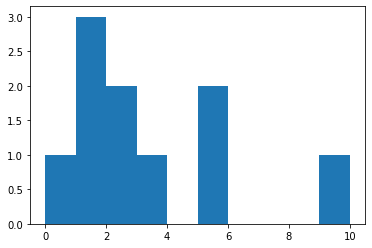

In [9]:
print(np.mean(X[:, 1]))
plt.hist(X[:, 1])
plt.show()

975.0


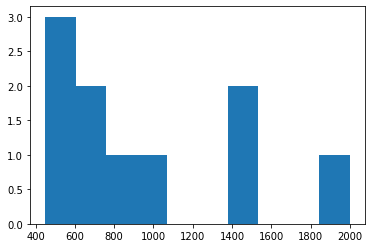

In [10]:
print(np.mean(X[:, 2]))
plt.hist(X[:, 2])
plt.show()

In [11]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [12]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

4.4408920985006264e-17
1.0


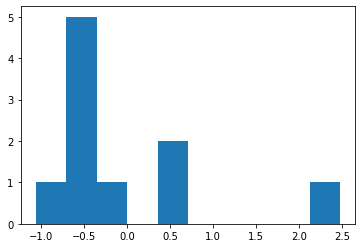

In [13]:
print(np.mean(X_st[:, 1]))
print(np.std(X_st[:, 1]))

plt.hist(X_st[:, 1])
plt.show()

-4.163336342344337e-17
0.9999999999999999


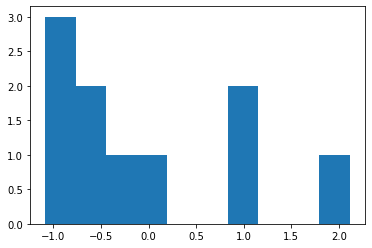

In [14]:
print(np.mean(X_st[:, 2]))
print(np.std(X_st[:, 2]))

plt.hist(X_st[:, 2])
plt.show()

SGD (Stochastic gradient descent)

In [15]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [16]:
W = np.random.randn(X.shape[1])
W

array([-1.01176695, -1.01760782, -0.51679833, -0.8863324 ])

In [17]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [18]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [ 1.73725848 -0.19319271  0.90366403 -1.31208909], error 3313.3719224066117
Iter: 500, weights: [56.49775341  5.84365668  1.56652988  5.04255143], error 25.546104011456055
Iter: 1000, weights: [56.49999991  6.15791044  0.32940829  6.00840392], error 24.98748397897186
Iter: 1500, weights: [56.5         6.25186902 -0.10986642  6.3681509 ], error 24.915354069728416
Iter: 2000, weights: [56.5         6.28470853 -0.26767178  6.49825774], error 24.906009704568422
Iter: 2500, weights: [56.5         6.29647868 -0.32445674  6.54512027], error 24.904799069652828
Iter: 3000, weights: [56.5         6.30071269 -0.3448952   6.56198966], error 24.904642222306855
Iter: 3500, weights: [56.5         6.30223655 -0.35225181  6.56806174], error 24.904621901489815
Iter: 4000, weights: [56.5         6.30278504 -0.35489976  6.57024734], error 24.904619268766886
Iter: 4500, weights: [56.5         6.30298247 -0.35585286  6.57103403], error 24.904618927676772
Final MSE: 24.904618883485846


array([56.5       ,  6.30305345, -0.35619553,  6.57131686])

In [19]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
            
            err = calc_mse(y, np.dot(X, W))
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [20]:
stohastic_gradient_descent(X_st, y, iterations=5000, batch_size=4, eta=1e-2)

amount of batches is 3
Iter: 0, weights: [3.93052206 1.10002796 1.50519312 0.12297481], error 2872.59776254601
Iter: 500, weights: [57.06287665  6.05336655 -0.66698208  6.87107684], error 25.317399233918707
Iter: 1000, weights: [57.05320802  6.1213256  -0.95487975  7.10611107], error 25.347187850754132
Iter: 1500, weights: [57.05252131  6.12608627 -0.9752425   7.12277779], error 25.350418130994267
Iter: 2000, weights: [57.0524727   6.12642321 -0.97668375  7.12395745], error 25.350652349744454
Iter: 2500, weights: [57.05246926  6.12644706 -0.97678575  7.12404094], error 25.35066895544481
Iter: 3000, weights: [57.05246902  6.12644875 -0.97679298  7.12404685], error 25.350670130917784
Iter: 3500, weights: [57.052469    6.12644887 -0.97679349  7.12404727], error 25.350670214117137
Iter: 4000, weights: [57.052469    6.12644888 -0.97679352  7.1240473 ], error 25.350670220005917
Iter: 4500, weights: [57.052469    6.12644888 -0.97679352  7.1240473 ], error 25.35067022042271
Final MSE: 25.35067

array([57.052469  ,  6.12644888, -0.97679353,  7.1240473 ])

##### L1 регуляризация

$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$
Про производную можно посмотреть [здесь](https://youtu.be/dHhYHGI9E6I).

##### L2 регуляризация

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda ||w||^{2} = 2\lambda w $$

In [21]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        #if i % (iterations / 10) == 0:
            #print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [22]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Final MSE: 24.904627646688823


array([56.49717514,  6.30234588, -0.35437787,  6.5698973 ])

In [23]:
gradient_descent(X_st, y, iterations=5000, eta=1e-1)

Iter: 0, weights: [11.53375662  1.73800313  1.48415157  2.34488502], error 3359.517782709446
Iter: 500, weights: [56.5         6.30306847 -0.35626807  6.57137674], error 24.90461887958385
Iter: 1000, weights: [56.5         6.30309349 -0.35638885  6.57147642], error 24.90461887690839
Iter: 1500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908383
Iter: 2000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.9046188769084
Iter: 2500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 3000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.9046188769084
Iter: 3500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Iter: 4000, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.9046188769084
Iter: 4500, weights: [56.5         6.30309349 -0.35638885  6.57147643], error 24.904618876908394
Final MSE: 24.9046188769084


array([56.5       ,  6.30309349, -0.35638885,  6.57147643])

## Домашнее задание <a class='anchor' id='hw'>

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

Final MSE: 24.904627646688812
Final MSE: 24.904630469743655
Final MSE: 24.9046342015009
Final MSE: 24.90463913442871
Final MSE: 24.904645655110876
Final MSE: 24.904654274524766
Final MSE: 24.90466566805581
Final MSE: 24.904680728377006
Final MSE: 24.904700635326385
Final MSE: 24.904726948241873
Final MSE: 24.904761727961667
Final MSE: 24.904807698011446
Final MSE: 24.904868457545483
Final MSE: 24.904948762632618
Final MSE: 24.905054897781827
Final MSE: 24.905195166594368
Final MSE: 24.9053805396459
Final MSE: 24.905625509839915
Final MSE: 24.90594922145598
Final MSE: 24.906376960143387
Final MSE: 24.90694211875952
Final MSE: 24.90768879027759
Final MSE: 24.908675186673012
Final MSE: 24.909978145226845
Final MSE: 24.911699065591733
Final MSE: 24.91397172811094
Final MSE: 24.916972583838948
Final MSE: 24.92093428922618
Final MSE: 24.926163495998367
Final MSE: 24.933064215335914
Final MSE: 24.94216847532331
Final MSE: 24.954176507431708
Final MSE: 24.970009363749448
Final MSE: 24.99087772

Text(0, 0.5, 'Вес признака')

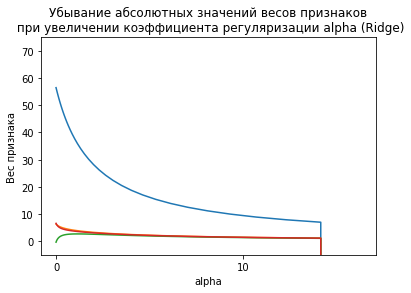

In [24]:
n = 100

coeffs = np.zeros((n, X_st.shape[1]))
alpha_list = np.logspace(-4, 2, n)

for i, val in enumerate(alpha_list):
    w = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=val)

    coeffs[i, :] = w

for i in range(X_st.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 20, 10))
plt.ylim(-5, 75)
plt.xlabel('alpha')
plt.ylabel('Вес признака')

Вывод из 1го задания: судя пографику, значимость регуризации признака цены репититора очень высокая по отношению к другим принзнакам<br>
Также видно что при  λ > 16 модель начинает лихорадить и занулять свои веса, оптимальный коэф рег. в районе 15

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [25]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        #Оставлю коммент чтобы были видны изменения
        #dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        #dReg = reg * W # градиент регуляризации
        dQ = 1/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')

    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [6.082955   1.14063194 1.81365428 1.52415831], error 3264.37985549068
Iter: 500, weights: [56.4999      6.297442   -0.32986956  6.54970267], error 24.90474478456303
Iter: 1000, weights: [56.4999      6.30265791 -0.35504822  6.57048456], error 24.904619198834403
Iter: 1500, weights: [56.4999      6.30268877 -0.35519718  6.57060751], error 24.90461913362378
Iter: 2000, weights: [56.4999      6.30268895 -0.35519806  6.57060824], error 24.90461913326171
Iter: 2500, weights: [56.4999      6.30268895 -0.35519806  6.57060824], error 24.904619133259565
Iter: 3000, weights: [56.4999      6.30268895 -0.35519806  6.57060824], error 24.904619133259533
Iter: 3500, weights: [56.4999      6.30268895 -0.35519806  6.57060824], error 24.90461913325954
Iter: 4000, weights: [56.4999      6.30268895 -0.35519806  6.57060824], error 24.90461913325954
Iter: 4500, weights: [56.4999      6.30268895 -0.35519806  6.57060824], error 24.90461913325954
Final MSE: 24.90461913325954


array([56.4999    ,  6.30268895, -0.35519806,  6.57060824])

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Сделаю следующим образом, возьму уже стандартизированные данные и пронормирую и посмотрю результат, затем преобразую обратно

In [26]:
#Беру простандартизированные данные и нормирую
X_st_norm = X_st.copy().astype(np.float64)
X_st_norm[:, 1] = min_max_scale(X_st_norm[:, 1])
X_st_norm[:, 2] = min_max_scale(X_st_norm[:, 2])
X_st_norm[:, 3] = min_max_scale(X_st_norm[:, 3])

X_st_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [27]:
#Полученную матрицу опять стандартизирую
X_st_norm[:, 1] = standard_scale(X_st_norm[:, 1])
X_st_norm[:, 2] = standard_scale(X_st_norm[:, 2])
X_st_norm[:, 3] = standard_scale(X_st_norm[:, 3])

X_st_norm

array([[ 1.00000000e+00, -7.07106781e-01, -9.79589689e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -7.07106781e-01, -5.67130873e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01, -4.64016169e-01,
         3.84110640e-01],
       [ 1.00000000e+00,  7.07106781e-01, -7.73360281e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -1.96261557e-16,  9.79589689e-01,
         3.84110640e-01],
       [ 1.00000000e+00, -1.06066017e+00, -3.60901465e-01,
        -8.96258160e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.08270439e+00,
         1.66447944e+00],
       [ 1.00000000e+00,  2.47487373e+00,  2.11385144e+00,
         1.66447944e+00],
       [ 1.00000000e+00, -7.07106781e-01, -1.08270439e+00,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01,  5.15573521e-02,
         3.84110640e-01]])

Видно что технически никаких запретов нет на нормализацию поверх стандартизации и наоборот. Однако датасет может быть только в одном из 2ух состояний либо стандартизирован, либо нормирован - 3го не дано.<br>

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [28]:
X_4, y_4 = make_regression(n_samples=200000, n_features=5, noise=0.5)
print(X_4)
print(y_4)

[[-0.86648292  1.51515046 -1.09958963  1.85131136  0.46226358]
 [-2.11266602 -0.36020861 -1.86671141  0.13415293 -2.54615709]
 [-1.07572742 -0.15399896 -0.16530526  0.53733623  1.07419175]
 ...
 [ 0.28980116 -0.42006593  2.14940155 -1.24819705 -2.23462705]
 [-0.30606423 -0.79930209 -1.1305949  -1.21339328 -0.76921642]
 [ 1.51331746  0.69169711 -0.57741917 -1.48075078 -2.36558896]]
[ -85.04354789 -435.55360503  -47.91178944 ...  109.57345943 -205.07593755
  -56.93634922]


In [29]:
%%time
w4_gd = gradient_descent(X_4, y_4, iterations=5000, eta=1e-3)
print(w4_gd)

Iter: 0, weights: [-0.95643754 -0.01842397  0.65515727  0.7727732  -0.53593769], error 17811.585687887688
Iter: 500, weights: [49.06224182  7.70753848 61.40258405 18.79875748 22.28228213], error 2403.1145393638253
Iter: 1000, weights: [67.34212758 10.4322716  83.80466303 25.45852398 30.63052014], error 324.4553154249188
Iter: 1500, weights: [74.02262704 11.39161486 92.06611235 27.9192373  33.68496208], error 43.99922405778383
Iter: 2000, weights: [76.46402412 11.72877734 95.11282589 28.82853174 34.80257986], error 6.15457859370181
Iter: 2500, weights: [77.35622319 11.84703993 96.23643293 29.16457025 35.21153859], error 1.0471520575786462
Iter: 3000, weights: [77.68226914 11.88843187 96.65081857 29.28876808 35.36119345], error 0.3577730269061101
Iter: 3500, weights: [77.80141785 11.90288458 96.80364637 29.33467508 35.41596155], error 0.26471102706936106
Iter: 4000, weights: [77.84495833 11.90791771 96.8600111  29.35164514 35.43600583], error 0.25214652818392985
Iter: 4500, weights: [77.

In [30]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X_4.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_sgd = []

# шаг градиентного спуска
eta = 1e-3

# максимальное число итераций
max_iter = 5000

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:

    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X_4.shape[0], size=1)

    y_pred = np.dot(X_4[train_ind], w)
    new_w = w - eta * 2 / y_4[train_ind].shape[0] * np.dot(X_4[train_ind].T, y_pred - y_4[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)

    error = mserror(X_4, new_w, y_4)

    w_list.append(new_w.copy())
    errors_sgd.append(error)

    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w

w_list = np.array(w_list)

#print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
#print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors_sgd[-1], 4)}')

Iteration #0: W_new = [-0.00021611  0.0042156  -0.00233762  0.00977221 -0.00222102], MSE = 17721.36
Iteration #100: W_new = [13.65584884 -0.59935529 15.64300451  3.06820525  5.69912494], MSE = 12465.05
Iteration #200: W_new = [19.33855663  1.95649582 28.6456997   5.66615475 11.74944653], MSE = 9312.92
Iteration #300: W_new = [30.00792442  4.41655386 41.81988933  9.27921961 16.1349048 ], MSE = 6160.88
Iteration #400: W_new = [38.37778074  4.13514836 48.95627372 14.68032052 17.56842354], MSE = 4456.99
Iteration #500: W_new = [43.9286564   4.20278062 57.90526504 18.33941778 21.38821717], MSE = 3054.47
Iteration #600: W_new = [49.19584347  5.11105558 63.64002985 20.33801929 23.6430742 ], MSE = 2197.83
Iteration #700: W_new = [53.02233125  6.37250211 69.0100543  21.6085198  24.43921925], MSE = 1609.19
Iteration #800: W_new = [58.21441168  8.32505405 74.75808088 23.30091502 26.06121338], MSE = 1015.43
Iteration #900: W_new = [61.70506701  8.66992787 78.66225834 24.48394098 27.81581931], MSE 

In [31]:
%%time
def gradient_descent_err(X, y, iterations, eta=1e-3):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        errors.append(calc_mse(y, y_pred))
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')

    return errors

Wall time: 0 ns


In [32]:
errors_gd = gradient_descent_err(X_4, y_4, iterations=5000, eta=1e-3)
print(errors_gd)
print(errors_sgd)

Iter: 0, weights: [ 0.63043121 -0.29171505  0.85363318 -0.7657061  -0.3050395 ], error 17603.753557960506
Iter: 500, weights: [49.64616752  7.60813818 61.4740176  18.23157382 22.36276593], error 2375.4626682040807
Iter: 1000, weights: [67.55700234 10.39612287 83.83035491 25.24941383 30.65849498], error 320.7774779675091
Iter: 1500, weights: [74.10169934 11.3784705  92.07534597 27.84213884 33.694655  ], error 43.51022322694295
Iter: 2000, weights: [76.49312289 11.72399847 95.11614188 28.80010445 34.80592642], error 6.0895853566587235
Iter: 2500, weights: [77.36693188 11.84530273 96.2376228  29.15408824 35.21268939], error 1.0385170999043944
Iter: 3000, weights: [77.68621016 11.88780046 96.65124516 29.28490288 35.36158737], error 0.35662625463855685
Iter: 3500, weights: [77.80286827 11.90265513 96.80379917 29.33324974 35.41609568], error 0.2645587936657428
Iter: 4000, weights: [77.84549214 11.90783434 96.86006578 29.35111951 35.43605122], error 0.2521263283031764
Iter: 4500, weights: [77

Text(0, 0.5, 'MSE')

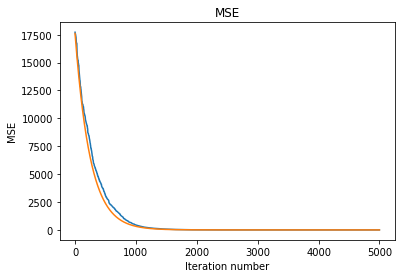

In [33]:
plt.plot(range(len(errors_sgd)), errors_sgd)
plt.plot(range(len(errors_gd)), errors_gd)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Метод SGD более скачущий, но на 5000 объектов и 5 признаков, GD отработал 1.03 а SGD за 3 секунды. С чем это связано до конца не понятно, возможно реализация или число<br>
На 200к объектов, первая функция отработала за 30 секунд, SGD за 1.30. Опять же скорее всего что-то не так с реализацией

Проект: 
1. https://www.kaggle.com/c/gb-tutors-expected-math-exam-results регрессия
1. https://www.kaggle.com/c/gb-choose-tutors классификация
